In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
data = pd.read_csv("Z:/Data/Monkeys/War Machine/2023-08-17/Videos/Deeplabcut/MVI_0288DLC_resnet50_RhodesInRigWithMarksAug18shuffle1_300000.csv", skiprows=3, header=None)

In [3]:
#Initialize variables
stimCmds = [0,20,40,60,	80,	100,110,120,130,140,150,170,190,210,230,250]
stimTimes = [21, 28, 35, 41, 57, 64, 75, 81, 88, 94, 101 ,109 ,116, 124, 133, 140]
useFramesMove = [670, 889, 1073, 1246, 1725, 1944, 2275, 2470, 2665, 2855, 3072, 3304, 3517, 3745, 4036] #I think these are hand selected frames by matt for when the stim is happening?
label1 = ["Forearm", "Wrist", "Hand", "MCP", "PIP", "DIP"]
label2 = ["x", "y", "likelihood"]
videoHeight = 720
fps = 29.97
threshold = 0.75
window = 30
#flip y pixels
data.iloc[:,2::3] = videoHeight - data.iloc[:,2::3]  #not used

In [4]:
def calculate_angle(p1,p2, p3):
    #Calculate the angle at p2
    #Calculate the vectors
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    #Calculate the angle
    angle = np.arccos(np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    #Convert to degrees
    angle = np.degrees(angle)
    return angle

calculate_angle((1,0),(0,0),(0.5,0.5)) #output should be 45 degrees

45.00000000000001

In [27]:
wristAngle = []
mcpAngle = []
pipAngle = []
for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    wrist = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    mcp = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    pip = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    dip = (data.iloc[i][data.columns[16]], data.iloc[i][data.columns[17]])
    wristAngle.append(calculate_angle(forearm, wrist, mcp))
    mcpAngle.append(calculate_angle(wrist, mcp, pip))
    pipAngle.append(calculate_angle(mcp, pip, dip))

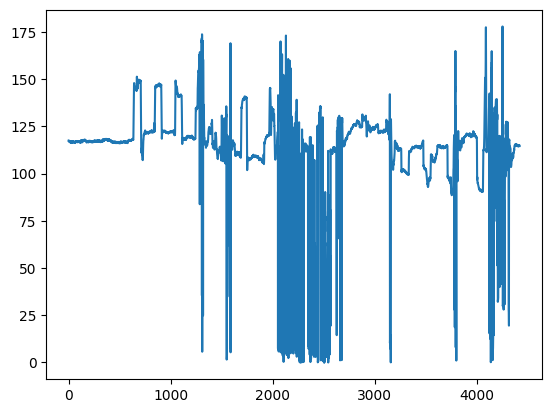

In [28]:
plt.plot(wristAngle)


# To do
- Figure out how to remove noisy movement from data
  - Interpolation or sliding average?
- Make a command curve for each angle
- Account for low likelihoods from DLC